# **Simple Linear Function**

Copyright 2019 Anthony Ng.

&emsp;

Licensed under the Apache License, Version 2.0 (the "License");

you may not use this file except in compliance with the License.

You may obtain a copy of the License at


&emsp;https://www.apache.org/licenses/LICENSE-2.0


Unless required by applicable law or agreed to in writing, software

distributed under the License is distributed on an "AS IS" BASIS,

WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.

See the License for the specific language governing permissions and

limitations under the License.

# Getting Started

## Problem Statement

Let's start with something extremely simple to understand the rationale of using neural networks.

We have some sample data generated by the following function $y = 3X + 50$. 

<!-- 
X	3X	C	Y
-20	-60	50	-10
-5	-15	50	35
1	3	50	53
5	15	50	65
20	60	50	110
55	165	50	215
76	228	50	278 -->

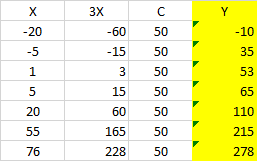
<!-- 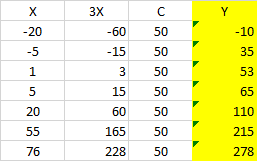
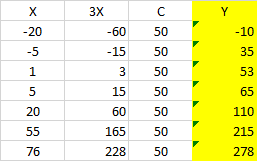
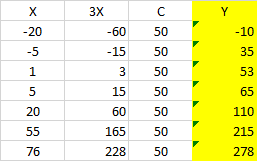 -->

In real life, we have no knowledge of the real function. We only have the data. Of course, if we know the real function, we can code it up. However, we don't. We have to estimate the function with the data given. That is the challenge here.


## Import Libraries

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Preparing the Training Data

In [14]:
X = np.array([-20, -5, 1, 5, 20, 55, 76],  dtype=float)
y = np.array([-10, 35, 53, 65, 110, 215, 278],  dtype=float)

In [15]:
X.ndim

1

### Side Note

 - **Feature(s)** — The independent variable(s) / input(s) to our model. In our case, X.

 - **Label(s) / Target(s)** — The dependent variable(s) / output our model predicts. In our case, y.

 - **Example** — A pair of feature/label provided to the machine learning algorithm during training. 



## Defining Our Model

We will start very simply with just the `Dense` layer and only **one** neuron.


#### Model and Layer Specification

We need to first instantiate (create an instance) a layer by calling `tf.keras.layers.Dense`.

*   `input_shape=[1]` — Value of 1 specify that we are only taking a single value to this layer. In our case, X.

*   `units=1` — Value of 1 specify that we are informing keras we are creating a neural network with only one neuron (some time called internal variable). The more complex a problem is, the more neuron you will need to learn the pattern. You may need more than a layer as well.

*   For our problem, we only have one layer. The `input_shape` then is also our first layer. With us specify it as 1 then, we are defining our neural network to take only a single value, which is a floating point number. Similarly, as this is our only layer, it is also our final layer. The `units` specify the number of output from our neural network - a single value, which is a single floating point number. One need to take care in a multi-layered network, the size and shape of the output layer as defined by `units` would need to match the `input_shape` of the next layer.


We can define this way:

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])


## Compile Model

We need to compile our neural network with further parameters:

- **Loss function** — The loss function is a performance metric. It is used to measure the errors of our model against the actual outcome. It is called loss function because the difference between our prediction and actual is called "loss".


- **Optimizer function** — The is the mathematic function that is used to adjust the model parameters to improve prediction accuracy. 







In [17]:
learning_rate = 0.1 # I tried 0.001, 0.01 and 0.1
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adam(learning_rate))

[Selecting the Right Evaluation Metric](https://towardsdatascience.com/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-1-regrression-metrics-3606e25beae0)

[Adam Optimization Algorithm](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

The learning rate (0.01 in our code) specified the step size taken by the optimizer when adjusting values in the model. There are no hard and fast rule with this. It will involve some trial and error. If it is too small, it will take too long and our model might not have converged yet when the training stopped as specify by the epoch variable. If it is too large,it might not converge at all. The typical range is usually between 0.001 (default) and 0.1.


## Training the Model

We can now proceed to train our model by calling the `fit` method.

Recal our actual model was $y = 3X + 50$. The slope 3 and intercept (bias) 50 are the two coefficients are asking the neural network to estimate.


*   The neural network starts off with random value (also called `weights`) and use it and the input X to compute y. As the weights started off with a random value, the prefiction will start off with large errors. 
*   The loss value is calculated using the loss function taking the prediction and actual value into account.
*   The optimizer then make slight (according to the learning rate) adjustments to the weights with the goal of reducing the loss
*   One epoch is the full iteration of the examples we have seen. i.e., all our data.


**Parameters**
*   input, X in our case
*   output, y in our case
*   `epochs` specifies how many cycles should be run
*   verbose argument controls how much output the fit method is displayed on the console.





In [18]:
history = model.fit(X, y, epochs=1000, verbose=False)

## Visualise Model Training

*   The `fit` method returned the training history statistics. We can access it via `history`
*   High loss means high error. 
*   By plotting is over epoch, we can visualise the error / accuracy over epoch.

In [19]:
loss = history.history['loss']

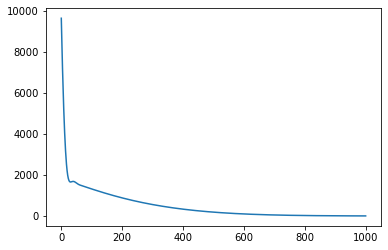

In [20]:
plt.plot(loss)

## Looking under the Hood

In [21]:
print(model.predict([100.0]))

[[350.86765]]


In [22]:
model.get_weights()

[array([[3.0316067]], dtype=float32), array([47.70697], dtype=float32)]

Recall $y = 3x + 50$. We are asking the neural network to estimate 3 (first variable) and 50 (second variable).